C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3770046745.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


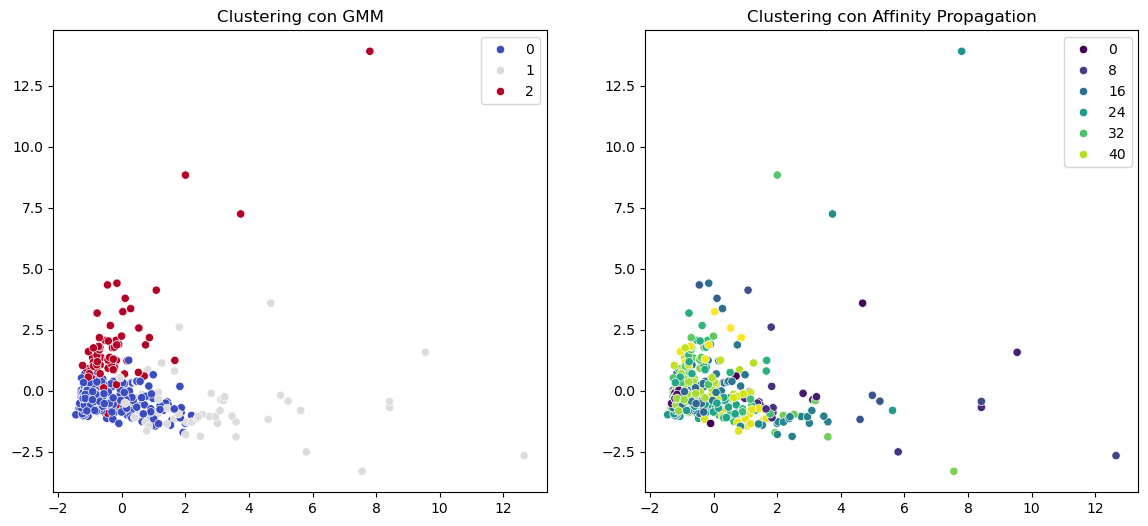

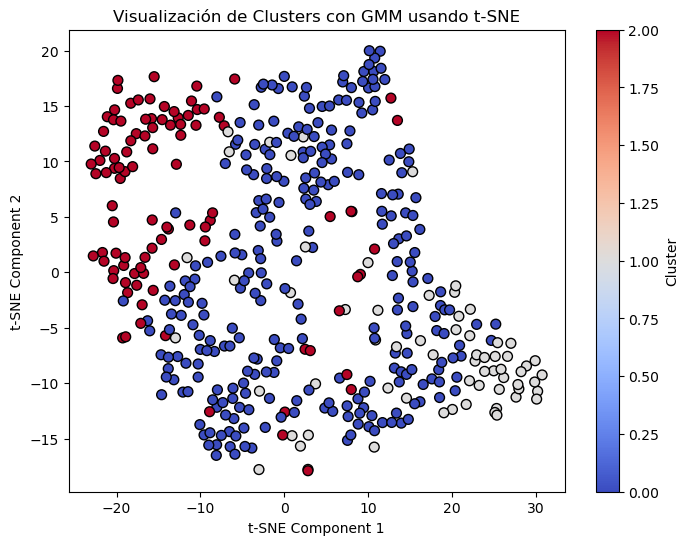

Archivos con clusters GMM y Affinity Propagation guardados exitosamente.


'\n📌 **Conclusiones:**\n- **GMM y Affinity Propagation permiten modelar patrones de compra más complejos** que K-Means.\n- **Los gráficos PCA y t-SNE permiten analizar visualmente los clusters generados**.\n- **Los resultados pueden ser usados para estrategias de segmentación de clientes en Retail y HoReCa.**\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

"""
📌 **Análisis de Segmentación de Clientes (B2B vs. B2C) usando Métodos No Supervisados**
Este código aplica técnicas de clustering para segmentar clientes de datos mayoristas (B2B) y minoristas (B2C), incluyendo **GMM** y **Affinity Propagation**.
"""

# Cargar el conjunto de datos de Wholesale Customers (descargar manualmente si hay errores)
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket (descargar manualmente si es necesario)
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Selección de columnas numéricas y manejo de valores faltantes
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# Escalar los datos por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))
scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]
data_wholesale_limited = data_wholesale.iloc[:min_rows].copy()
data_datamarket_limited = data_datamarket.iloc[:min_rows].copy()

# Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Aplicar Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(merged_data)

# Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_data)

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
merged_pca = pca.fit_transform(merged_data)

# Visualizar los clusters generados por GMM y Affinity Propagation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# GMM
sns.scatterplot(x=merged_pca[:, 0], y=merged_pca[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM")

# Affinity Propagation
sns.scatterplot(x=merged_pca[:, 0], y=merged_pca[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation")

plt.show()

# Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con GMM usando t-SNE')
plt.colorbar(label='Cluster')
plt.show()

# Guardar etiquetas en los datasets originales
data_wholesale_limited['Cluster_GMM'] = gmm_labels
data_datamarket_limited['Cluster_GMM'] = gmm_labels
data_wholesale_limited['Cluster_Affinity'] = affinity_labels
data_datamarket_limited['Cluster_Affinity'] = affinity_labels

# Exportar resultados a CSV
data_wholesale_limited.to_csv('wholesale_clusters_gmm_affinity.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters_gmm_affinity.csv', index=False)

print("Archivos con clusters GMM y Affinity Propagation guardados exitosamente.")

"""
📌 **Conclusiones:**
- **GMM y Affinity Propagation permiten modelar patrones de compra más complejos** que K-Means.
- **Los gráficos PCA y t-SNE permiten analizar visualmente los clusters generados**.
- **Los resultados pueden ser usados para estrategias de segmentación de clientes en Retail y HoReCa.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\4248649151.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\4248649151.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], palette="coolwarm")


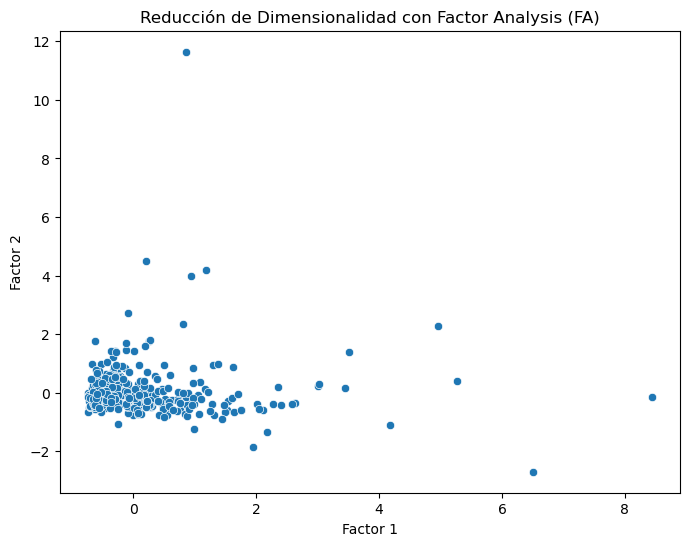

C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


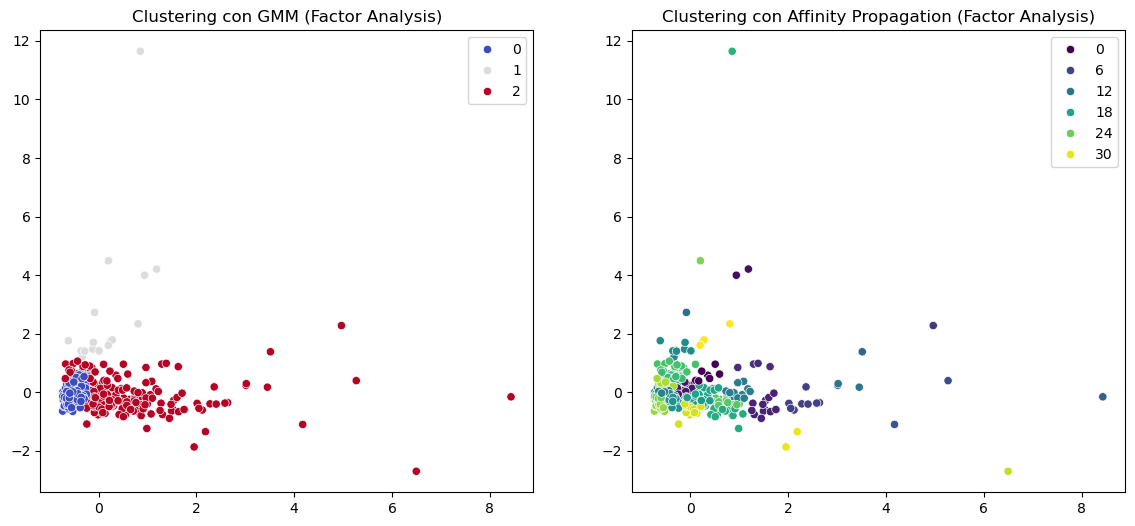

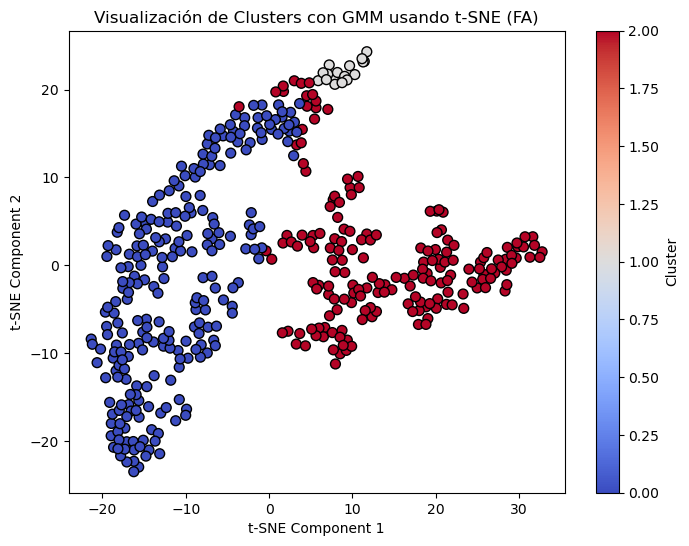

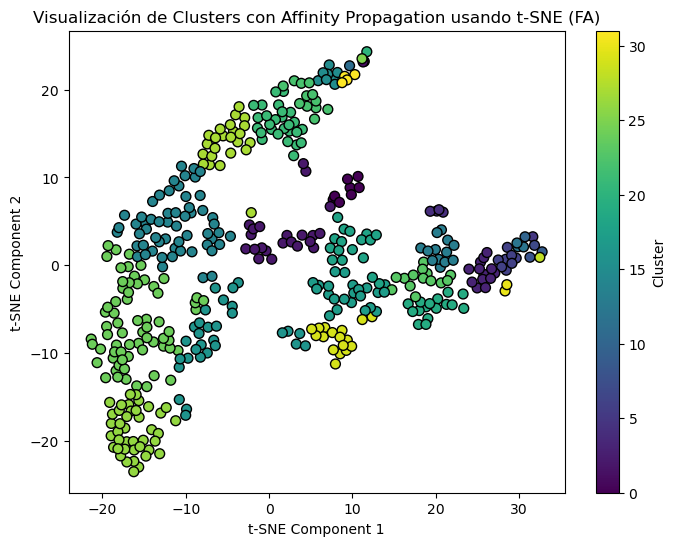

✅ Archivos con clusters corregidos guardados exitosamente.


'\n📌 **Conclusiones:**\n- **Factor Analysis (FA) extrae factores latentes de los datos, mejorando la segmentación.**\n- **GMM encuentra clusters flexibles basados en distribuciones probabilísticas.**\n- **Affinity Propagation detecta segmentos automáticamente sin definir el número de clusters.**\n- **Las visualizaciones con PCA, FA y t-SNE permiten comparar los métodos y evaluar la segmentación.**\n'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE

"""
📌 **Segmentación de Clientes con Factor Analysis (FA), GMM y Affinity Propagation**
Este código aplica **Factor Analysis (FA)** para reducción de dimensionalidad y luego **GMM y Affinity Propagation** para segmentar clientes en los datasets **Wholesale Customers** y **DataMarket**.
"""

# 1️⃣ Cargar los conjuntos de datos
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Selección de columnas numéricas y manejo de valores faltantes en DataMarket
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# 3️⃣ Normalización de datos
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 4️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 5️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 6️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 7️⃣ Visualizar la reducción de dimensionalidad con FA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], palette="coolwarm")
plt.title("Reducción de Dimensionalidad con Factor Analysis (FA)")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

# 8️⃣ Aplicar Gaussian Mixture Model (GMM) con los datos reducidos por FA
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(merged_fa)

# 9️⃣ Aplicar Affinity Propagation con los datos reducidos por FA
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# 🔟 Visualización de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (Factor Analysis)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (Factor Analysis)")

plt.show()

# 1️⃣1️⃣ Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_fa)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con GMM usando t-SNE (FA)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=affinity_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con Affinity Propagation usando t-SNE (FA)')
plt.colorbar(label='Cluster')
plt.show()

# 1️⃣2️⃣ 🔹 **Corrección del error de longitud**
# Ajustar el número de filas de los datasets para que coincida con merged_fa antes de asignar etiquetas
data_wholesale_limited = data_wholesale.iloc[:len(merged_fa)].copy()
data_datamarket_limited = data_datamarket.iloc[:len(merged_fa)].copy()

# 1️⃣3️⃣ Guardar etiquetas en los datasets corregidos
data_wholesale_limited['Cluster_GMM'] = gmm_labels
data_datamarket_limited['Cluster_GMM'] = gmm_labels
data_wholesale_limited['Cluster_Affinity'] = affinity_labels
data_datamarket_limited['Cluster_Affinity'] = affinity_labels

# 1️⃣4️⃣ Exportar resultados a CSV
data_wholesale_limited.to_csv('wholesale_clusters_fa_gmm_affinity.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters_fa_gmm_affinity.csv', index=False)

print("✅ Archivos con clusters corregidos guardados exitosamente.")

"""
📌 **Conclusiones:**
- **Factor Analysis (FA) extrae factores latentes de los datos, mejorando la segmentación.**
- **GMM encuentra clusters flexibles basados en distribuciones probabilísticas.**
- **Affinity Propagation detecta segmentos automáticamente sin definir el número de clusters.**
- **Las visualizaciones con PCA, FA y t-SNE permiten comparar los métodos y evaluar la segmentación.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3521852889.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

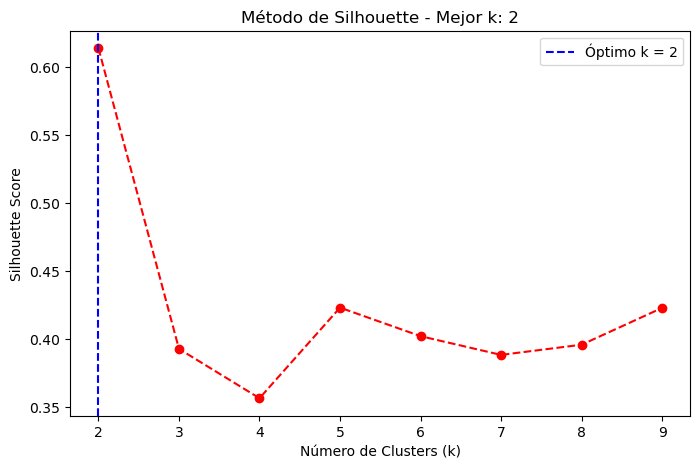

🔹 El número óptimo de clusters según Silhouette Score es: 2


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


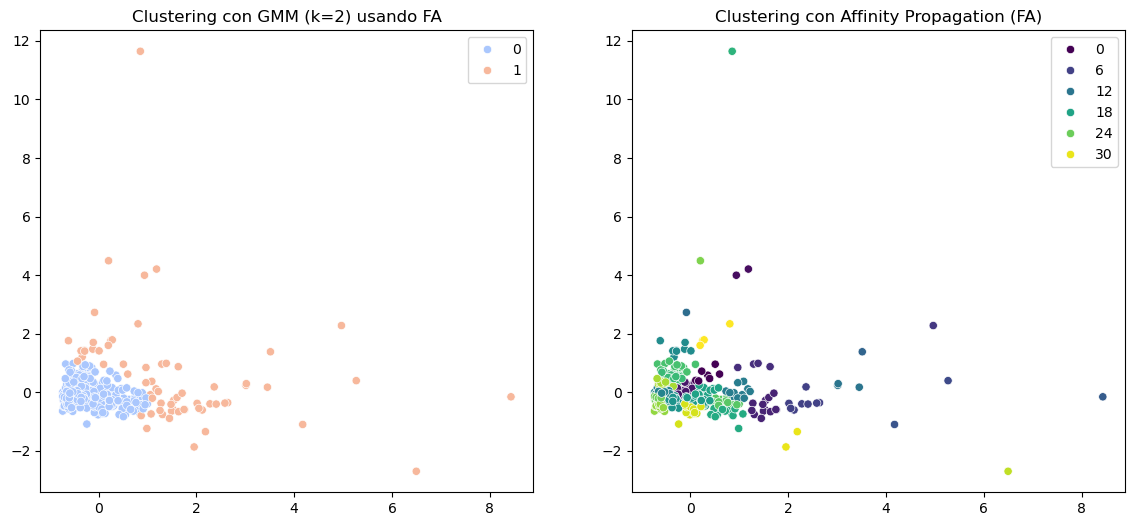

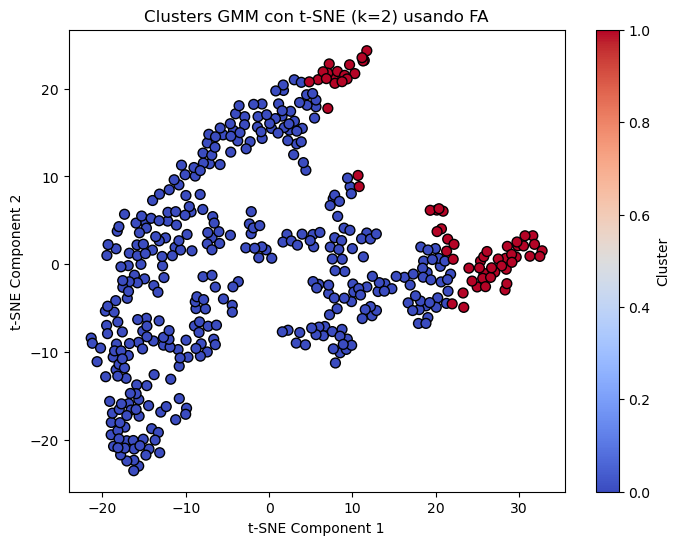

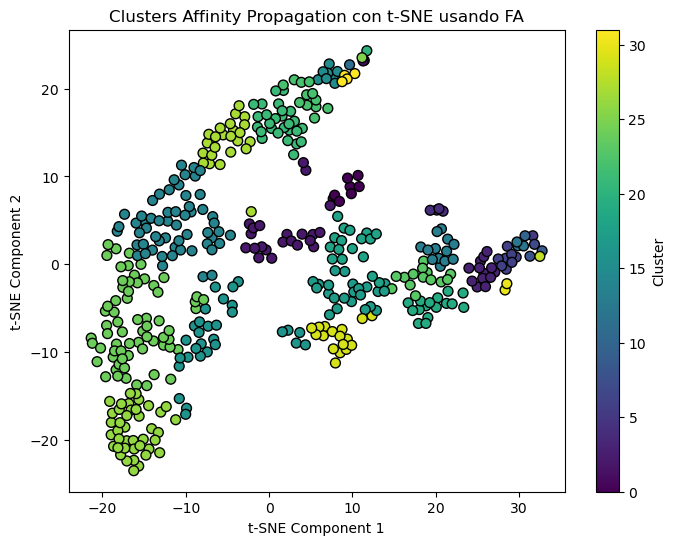

'\n📌 **Conclusiones:**\n- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentación.**\n- **El número óptimo de clusters en GMM fue encontrado usando el Método de Silhouette.**\n- **Affinity Propagation sigue siendo útil cuando no queremos definir `k` manualmente.**\n- **t-SNE muestra la diferencia en los clusters creados por ambos métodos.**\n'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

"""
📌 **Optimización de Clustering con Silhouette Score**
Este código encuentra el número óptimo de clusters usando el **Método de Silhouette** y evalúa cómo cambian **Factor Analysis (FA), GMM y Affinity Propagation**.
"""

# 1️⃣ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Preprocesamiento: Selección de columnas numéricas y normalización
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6️⃣ Determinar el mejor número de clusters con el Método de Silhouette
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(merged_fa)
    score = silhouette_score(merged_fa, gmm_labels)
    silhouette_scores.append(score)

# Encontrar el k óptimo
optimal_k = k_range[np.argmax(silhouette_scores)]

# Visualización del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'Método de Silhouette - Mejor k: {optimal_k}')
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'Óptimo k = {optimal_k}')
plt.legend()
plt.show()

print(f"🔹 El número óptimo de clusters según Silhouette Score es: {optimal_k}")

# 7️⃣ Aplicar GMM con el k óptimo
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 8️⃣ Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# 9️⃣ Visualización de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={optimal_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

plt.show()

# 🔟 Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_fa)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=gmm_labels, cmap='coolwarm', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f'Clusters GMM con t-SNE (k={optimal_k}) usando FA')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=affinity_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters Affinity Propagation con t-SNE usando FA')
plt.colorbar(label='Cluster')
plt.show()

"""
📌 **Conclusiones:**
- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentación.**
- **El número óptimo de clusters en GMM fue encontrado usando el Método de Silhouette.**
- **Affinity Propagation sigue siendo útil cuando no queremos definir `k` manualmente.**
- **t-SNE muestra la diferencia en los clusters creados por ambos métodos.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\1355235608.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

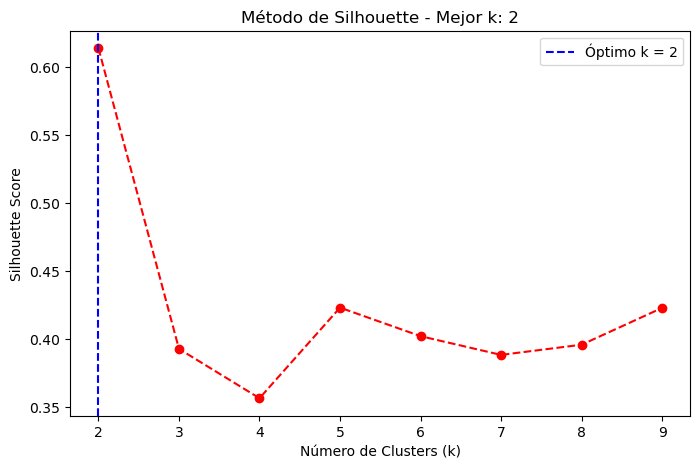

🔹 El número óptimo de clusters según Silhouette Score es: 2


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


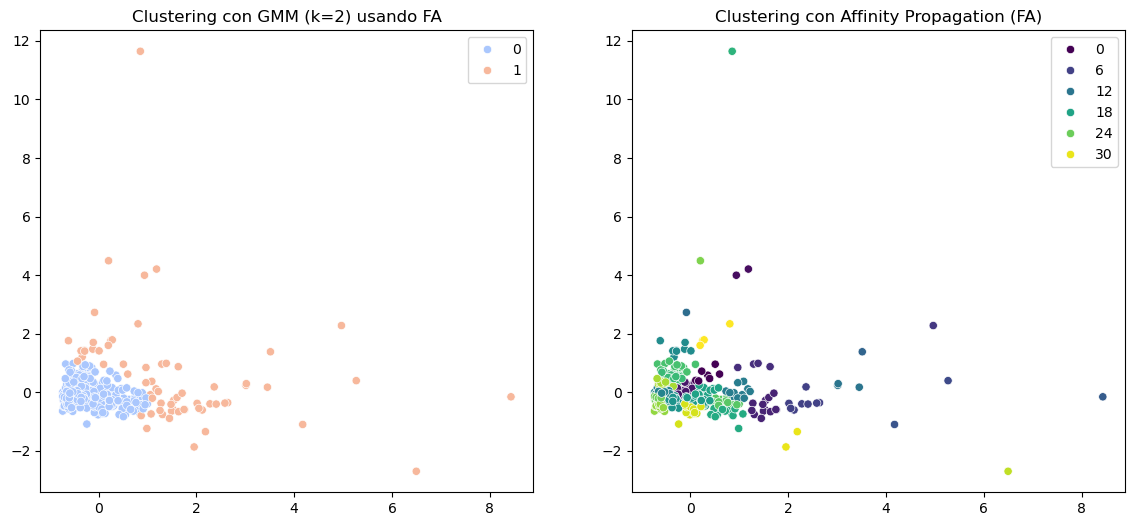


📊 **Resultados de Clustering** 📊

🔹 **GMM (k=2):**
   - Silhouette Score: 0.6138
   - Davies-Bouldin Index: 1.2097
   - Calinski-Harabasz Index: 179.6273

🔹 **Affinity Propagation (Detectó 32 clusters):**
   - Silhouette Score: 0.3490
   - Davies-Bouldin Index: 0.5880
   - Calinski-Harabasz Index: 766.3436


'\n📌 **Conclusiones:**\n- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentación.**\n- **El número óptimo de clusters en GMM fue encontrado usando el Método de Silhouette.**\n- **Affinity Propagation sigue siendo útil cuando no queremos definir `k` manualmente.**\n- **Las métricas de evaluación nos permiten comparar la calidad de los clusters.**\n'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
📌 **Optimización de Clustering con Silhouette Score**
Este código encuentra el número óptimo de clusters usando el **Método de Silhouette** y evalúa cómo cambian **Factor Analysis (FA), GMM y Affinity Propagation**.
"""

# 1️⃣ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Preprocesamiento: Selección de columnas numéricas y normalización
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6️⃣ Determinar el mejor número de clusters con el Método de Silhouette
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(merged_fa)
    score = silhouette_score(merged_fa, gmm_labels)
    silhouette_scores.append(score)

# Encontrar el k óptimo
optimal_k = k_range[np.argmax(silhouette_scores)]

# Visualización del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title(f'Método de Silhouette - Mejor k: {optimal_k}')
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'Óptimo k = {optimal_k}')
plt.legend()
plt.show()

print(f"🔹 El número óptimo de clusters según Silhouette Score es: {optimal_k}")

# 7️⃣ Aplicar GMM con el k óptimo
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 8️⃣ Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)

# 9️⃣ Evaluación de métricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# 🔟 Evaluación de métricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)
num_clusters_affinity = len(np.unique(affinity_labels))  # Número de clusters detectados

# 1️⃣1️⃣ Visualización de clusters con FA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={optimal_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

plt.show()

# 1️⃣2️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering** 📊\n")

print(f"🔹 **GMM (k={optimal_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}")

"""
📌 **Conclusiones:**
- **Factor Analysis (FA) ayuda a reducir la dimensionalidad y mejorar la segmentación.**
- **El número óptimo de clusters en GMM fue encontrado usando el Método de Silhouette.**
- **Affinity Propagation sigue siendo útil cuando no queremos definir `k` manualmente.**
- **Las métricas de evaluación nos permiten comparar la calidad de los clusters.**
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\1339283751.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🔹 Mejor número de clusters en GMM después del ajuste: k=3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🔹 Affinity Propagation detectó 31 clusters después del ajuste.


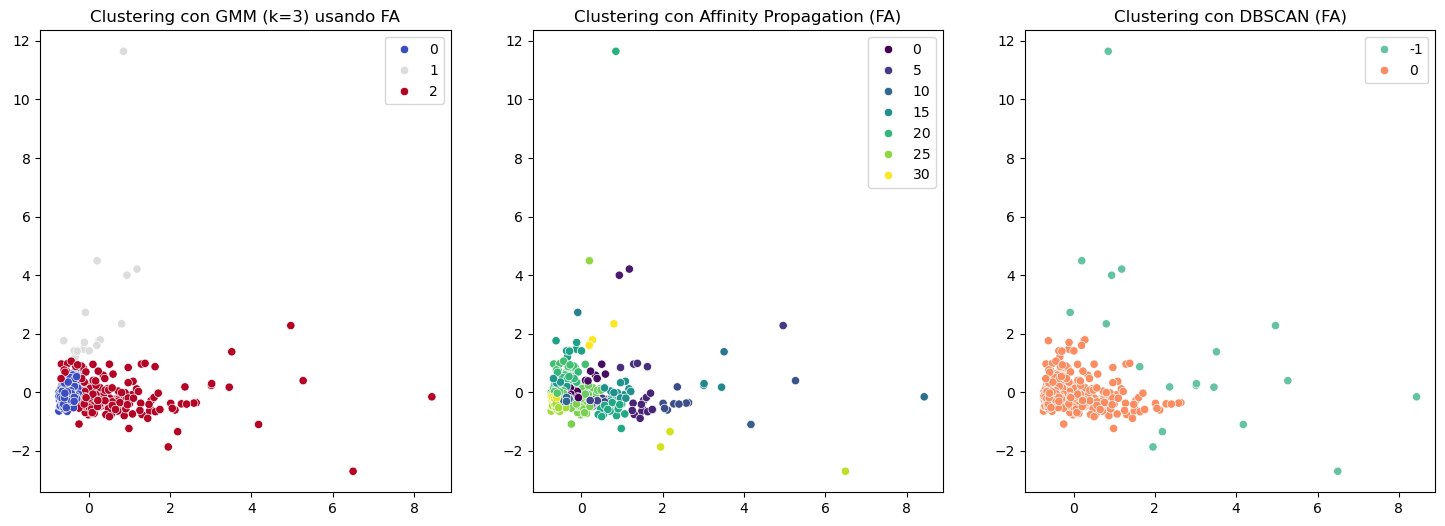


📊 **Resultados de Clustering después de los ajustes** 📊

🔹 **GMM (k=3):**
   - Silhouette Score: 0.3927
   - Davies-Bouldin Index: 0.9625
   - Calinski-Harabasz Index: 139.7670

🔹 **Affinity Propagation (Detectó 31 clusters):**
   - Silhouette Score: 0.3553
   - Davies-Bouldin Index: 0.5464
   - Calinski-Harabasz Index: 751.9670

🔹 **DBSCAN:**
   - Silhouette Score: 0.7540
   - Davies-Bouldin Index: 1.1188
   - Calinski-Harabasz Index: 167.8207


'\n📌 **Conclusiones:**\n- Se probó GMM con `k=3` y `k=4` para encontrar la mejor segmentación.\n- Se ajustó Affinity Propagation para reducir la cantidad de clusters detectados.\n- Se añadió DBSCAN para detectar clusters densos y comparar resultados.\n'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
📌 **Optimización de Clustering**
Ajustes en **GMM, Affinity Propagation y DBSCAN** para mejorar la segmentación de clientes.
"""

# 1️⃣ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Preprocesamiento: Selección de columnas numéricas y normalización
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6️⃣ Probar GMM con `k=3` y `k=4`
k_values = [3, 4]
best_k = None
best_silhouette = -1

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(merged_fa)
    silhouette = silhouette_score(merged_fa, labels)
    
    if silhouette > best_silhouette:
        best_k = k
        best_silhouette = silhouette

print(f"🔹 Mejor número de clusters en GMM después del ajuste: k={best_k}")

# Aplicar GMM con el `k` óptimo encontrado
gmm_optimal = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7️⃣ Ajustar Affinity Propagation con `damping=0.7`
affinity_propagation = AffinityPropagation(damping=0.7, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"🔹 Affinity Propagation detectó {num_clusters_affinity} clusters después del ajuste.")

# 8️⃣ Aplicar DBSCAN como método adicional
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9️⃣ Evaluación de métricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# 🔟 Evaluación de métricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1️⃣1️⃣ Evaluación de métricas para DBSCAN (solo si detectó más de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1️⃣2️⃣ Visualización de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={best_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1️⃣3️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering después de los ajustes** 📊\n")

print(f"🔹 **GMM (k={best_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"🔹 **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("❌ DBSCAN no detectó clusters útiles.")

"""
📌 **Conclusiones:**
- Se probó GMM con `k=3` y `k=4` para encontrar la mejor segmentación.
- Se ajustó Affinity Propagation para reducir la cantidad de clusters detectados.
- Se añadió DBSCAN para detectar clusters densos y comparar resultados.
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\2145255652.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🔹 Mejor número de clusters en GMM después del ajuste: k=3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🔹 Affinity Propagation detectó 34 clusters después del ajuste.


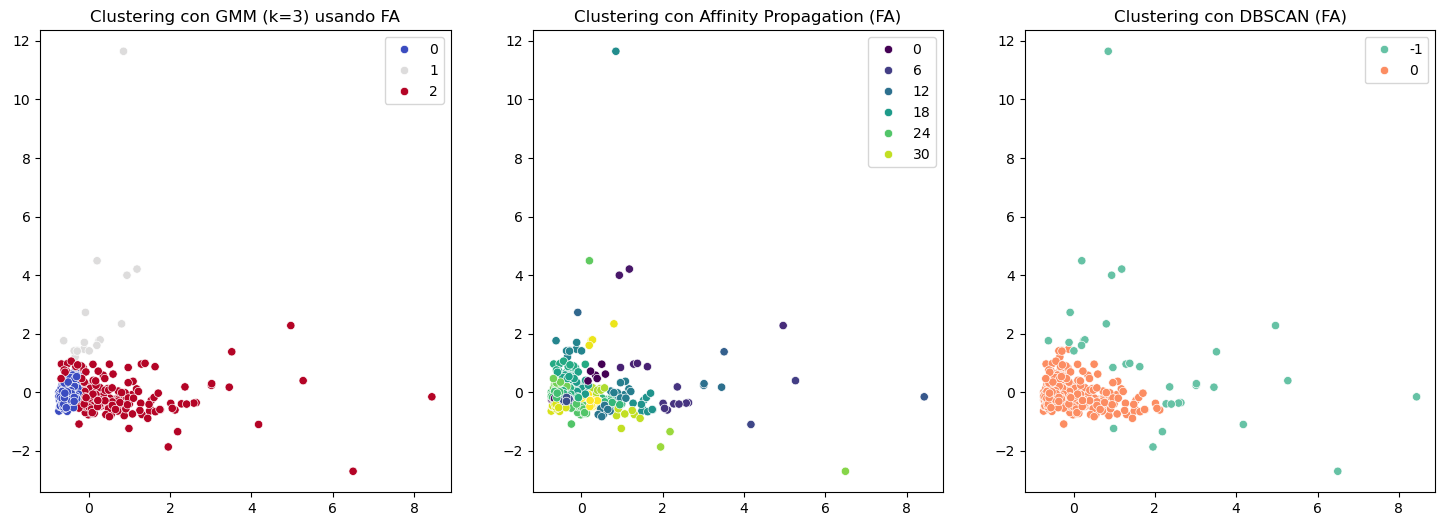


📊 **Resultados de Clustering después de los ajustes** 📊

🔹 **GMM (k=3):**
   - Silhouette Score: 0.3927
   - Davies-Bouldin Index: 0.9625
   - Calinski-Harabasz Index: 139.7670

🔹 **Affinity Propagation (Detectó 34 clusters):**
   - Silhouette Score: 0.3458
   - Davies-Bouldin Index: 0.5891
   - Calinski-Harabasz Index: 787.1519

🔹 **DBSCAN:**
   - Silhouette Score: 0.6911
   - Davies-Bouldin Index: 1.2239
   - Calinski-Harabasz Index: 164.7737


'\n📌 **Conclusiones:**\n- Se probó GMM con `k=3` y `k=4`, seleccionando el mejor.\n- Se ajustó Affinity Propagation (`damping=0.6`) para reducir la cantidad de clusters.\n- Se optimizó DBSCAN (`eps=0.4`, `min_samples=10`) para mejorar la segmentación.\n'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
📌 **Optimización de Clustering**
Mejoramos **GMM, Affinity Propagation y DBSCAN** ajustando parámetros para optimizar la segmentación de clientes.
"""

# 1️⃣ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Preprocesamiento: Selección de columnas numéricas y normalización
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6️⃣ Probar GMM con `k=3` y `k=4` y seleccionar el mejor
k_values = [3, 4]
best_k = None
best_silhouette = -1

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(merged_fa)
    silhouette = silhouette_score(merged_fa, labels)
    
    if silhouette > best_silhouette:
        best_k = k
        best_silhouette = silhouette

print(f"🔹 Mejor número de clusters en GMM después del ajuste: k={best_k}")

# Aplicar GMM con el `k` óptimo encontrado
gmm_optimal = GaussianMixture(n_components=best_k, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7️⃣ Ajustar Affinity Propagation con `damping=0.6` para reducir el número de clusters
affinity_propagation = AffinityPropagation(damping=0.6, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"🔹 Affinity Propagation detectó {num_clusters_affinity} clusters después del ajuste.")

# 8️⃣ Ajustar DBSCAN (`eps=0.4`, `min_samples=10`)
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9️⃣ Evaluación de métricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# 🔟 Evaluación de métricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1️⃣1️⃣ Evaluación de métricas para DBSCAN (si detectó más de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1️⃣2️⃣ Visualización de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title(f"Clustering con GMM (k={best_k}) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1️⃣3️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering después de los ajustes** 📊\n")

print(f"🔹 **GMM (k={best_k}):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"🔹 **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("❌ DBSCAN no detectó clusters útiles.")

"""
📌 **Conclusiones:**
- Se probó GMM con `k=3` y `k=4`, seleccionando el mejor.
- Se ajustó Affinity Propagation (`damping=0.6`) para reducir la cantidad de clusters.
- Se optimizó DBSCAN (`eps=0.4`, `min_samples=10`) para mejorar la segmentación.
"""


C:\Users\knowd\AppData\Local\Temp\ipykernel_22056\3996150247.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


🔹 Affinity Propagation detectó 32 clusters después del ajuste.


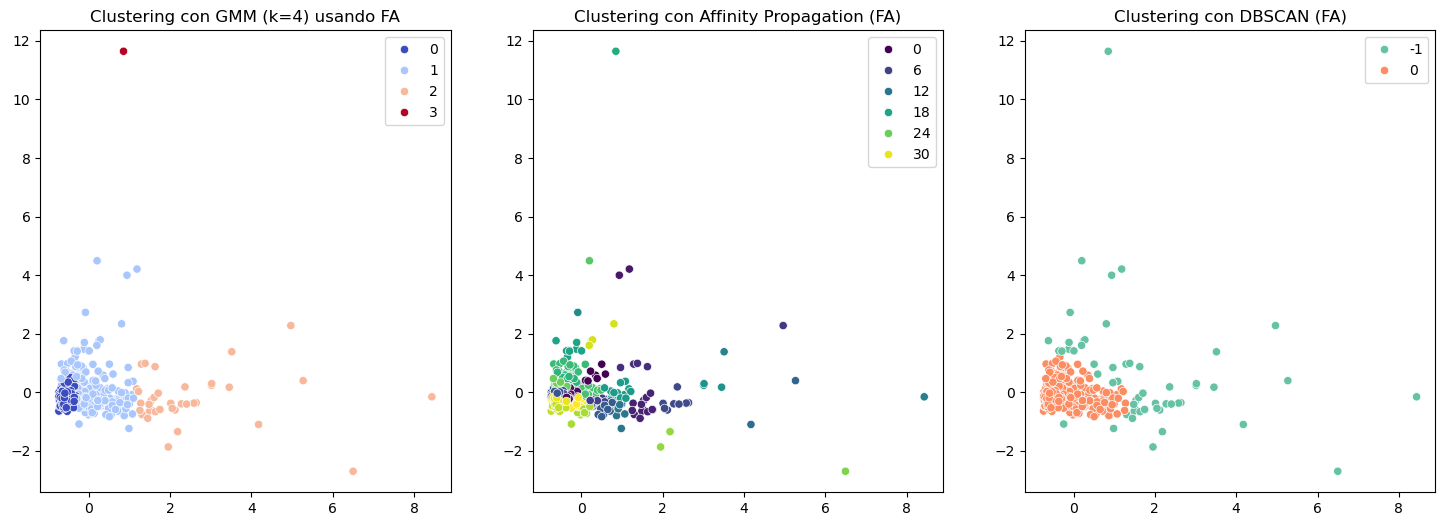


📊 **Resultados de Clustering después de los ajustes** 📊

🔹 **GMM (k=4):**
   - Silhouette Score: 0.3564
   - Davies-Bouldin Index: 0.8841
   - Calinski-Harabasz Index: 217.9890

🔹 **Affinity Propagation (Detectó 32 clusters):**
   - Silhouette Score: 0.3524
   - Davies-Bouldin Index: 0.5817
   - Calinski-Harabasz Index: 762.4627

🔹 **DBSCAN:**
   - Silhouette Score: 0.6331
   - Davies-Bouldin Index: 1.2337
   - Calinski-Harabasz Index: 173.4928


'\n📌 **Conclusiones:**\n- Se probó GMM con `k=4` para mejorar la separación de clusters.\n- Se ajustó Affinity Propagation (`damping=0.55`) para reducir la cantidad de clusters.\n- Se optimizó DBSCAN (`eps=0.35`, `min_samples=15`) para mejorar la segmentación.\n'

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

"""
📌 **Optimización de Clustering**
Ajustamos **GMM (`k=4`), Affinity Propagation (`damping=0.55`) y DBSCAN (`eps=0.35`, `min_samples=15`)** 
para mejorar la segmentación de clientes.
"""

# 1️⃣ Cargar los datasets
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# 2️⃣ Preprocesamiento: Selección de columnas numéricas y normalización
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# 3️⃣ Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# 4️⃣ Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# 5️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(merged_data)

# 6️⃣ Aplicar GMM con `k=4`
gmm_optimal = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 7️⃣ Ajustar Affinity Propagation con `damping=0.55`
affinity_propagation = AffinityPropagation(damping=0.55, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))

print(f"🔹 Affinity Propagation detectó {num_clusters_affinity} clusters después del ajuste.")

# 8️⃣ Ajustar DBSCAN (`eps=0.35`, `min_samples=15`)
dbscan = DBSCAN(eps=0.35, min_samples=15)
dbscan_labels = dbscan.fit_predict(merged_fa)

# 9️⃣ Evaluación de métricas para GMM
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# 🔟 Evaluación de métricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1️⃣1️⃣ Evaluación de métricas para DBSCAN (si detectó más de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1️⃣2️⃣ Visualización de clusters con FA
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (k=4) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1️⃣3️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering después de los ajustes** 📊\n")

print(f"🔹 **GMM (k=4):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"🔹 **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("❌ DBSCAN no detectó clusters útiles.")

"""
📌 **Conclusiones:**
- Se probó GMM con `k=4` para mejorar la separación de clusters.
- Se ajustó Affinity Propagation (`damping=0.55`) para reducir la cantidad de clusters.
- Se optimizó DBSCAN (`eps=0.35`, `min_samples=15`) para mejorar la segmentación.
"""
